<img src="https://www.nyp.edu.sg/content/dam/nyp/logo.png" width='200'/>

Welcome to the lab! Before we get started here are a few pointers on Jupyter notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.
    

# Phishing Prediction Exercise using Naive Bayes (Answer)
In this lab, we will be working with a Phishing Dataset to train a Naive Bayes model. 

There are some parts that requires your input and some blanks indicated with **None** for you to fill in.

This lab is very similiar to the Malware Prediction, except that we are using a different dataset and a different algorithm.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 1: Read the csv file

In [2]:
# Ex1a: Load the data - answer
data_dir_path='data/'
file_name = 'phishing_dataset.csv'
df = pd.read_csv(data_dir_path + file_name)

### Exercise 2: Preview and process the data

In [3]:
df.head(5)

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df.tail(5)

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,11055,-1,-1,1,1,1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [5]:
# Print the shape (Get the number of rows and cols)
df.shape

(11055, 32)

In [6]:
# Ex2a: Get the column names -- answer
df.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [7]:
# Ex2b: display the correlation of the dataset -- answer
df.corr()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,1.000000,-0.388317,0.006105,-0.006281,-0.169478,-0.003363,-0.007340,0.234091,-0.006682,-0.001180,...,0.006515,0.002533,0.115320,0.400890,-0.014900,0.065117,-0.012527,0.002442,0.163799,0.000978
having_IPhaving_IP_Address,-0.388317,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,0.006105,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,-0.006281,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.169478,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,-0.003363,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.007340,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,0.234091,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,-0.006682,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.001180,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789


In [8]:
# Checking for duplicates and removing them
df.drop_duplicates(inplace = True)

In [9]:
# Show the new shape (number of rows & columns)
df.shape

(11055, 32)

In [10]:
# Show the number of missing (NAN, NaN, na) data for each column
df.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [11]:
# list the different result and the number of records with it
df["Result"].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


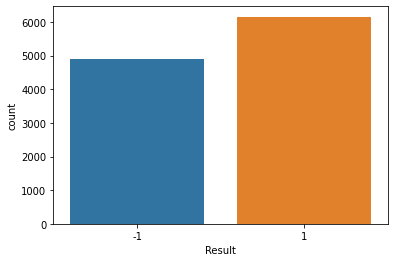

In [12]:
# Ex2c: Use a statistical graph to visualise the data above -- answer
sns.countplot(df["Result"])
plt.show()

### Exerise 3: Identify the features and label

In [13]:
# Ex3a: Define x-axis -- answer
x = df.drop(["Result"],axis=1) #axis = 0 (drop by index), axis = 1
x.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,5,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [14]:
# Ex3b: Define y-axis -- answer
y = df["Result"]
y

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Result, Length: 11055, dtype: int64

### Exercise 4: Choose and train the model
We will be using Naive Bayes (GaussianNB) for this exercise

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [16]:
# Ex4a: spilt the data -- answer
x_train,x_test,y_train,y_test=train_test_split(x,y, shuffle=True, test_size=0.2, stratify=y)

In [17]:
# Ex4b: train the model -- answer
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [18]:
pred=model.predict(x_test)
pred

array([-1,  1, -1, ..., -1, -1, -1])

In [19]:
# Ex4c: display the model score -- answer
model.score(x_test,y_test)

0.8792401628222524

In [20]:
result=pd.DataFrame({
    "Actual_Value":y_test,
    "Predict_Value":pred
})
result

,Actual_Value,Predict_Value
3415,-1,-1
4120,1,1
3059,-1,-1
6664,1,1
3352,1,1
...,...,...
7607,-1,-1
5136,1,1
6117,-1,-1
6243,-1,-1


### Exercise 5: Evaluate the model and display the reports




In [21]:
# Ex5a: Evaluate the model using the training data -- answer
pred = model.predict(x_train)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [23]:
# Ex5b: Display classification report -- answer
print('Classification Report: \n',classification_report(y_train ,pred ))

Classification Report: 
               precision    recall  f1-score   support

          -1       0.83      0.94      0.88      3918
           1       0.95      0.84      0.89      4926

    accuracy                           0.89      8844
   macro avg       0.89      0.89      0.89      8844
weighted avg       0.90      0.89      0.89      8844



In [24]:
# Ex5c: Display Confusion Matrix and accuracy -- answer
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

Confusion Matrix: 
 [[3699  219]
 [ 776 4150]]

Accuracy:  0.8874943464495704


Confusion matrix for training data


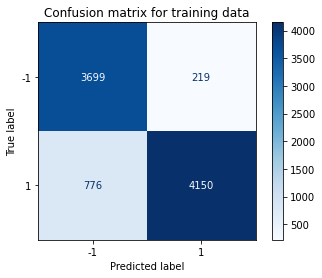

In [25]:
# Ex5c (optional): Plot the Confusion Matrix for easy visualisation -- answer
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix for training data", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_train, y_train,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 values_format='')
    disp.ax_.set_title(title)

    print(title)

plt.show()

              precision    recall  f1-score   support

          -1       0.82      0.94      0.87       980
           1       0.94      0.83      0.88      1231

    accuracy                           0.88      2211
   macro avg       0.88      0.89      0.88      2211
weighted avg       0.89      0.88      0.88      2211

Confusion Matrix: 
 [[ 918   62]
 [ 205 1026]]

Accuracy:  0.8792401628222524

Confusion matrix for testing data


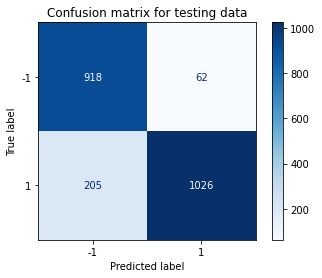

In [27]:
# Ex5d: repeat Ex5a-5c on testing data -- answer
pred = model.predict(x_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))
print()
titles_options = [("Confusion matrix for testing data", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 values_format='')
    disp.ax_.set_title(title)

    print(title)

plt.show()